In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset1 = pd.read_csv('/content/MYNNDATA.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [18]:
class NeuralNet(nn.Module):
  def __init__ (self):
        super().__init__()  # Changed _init_ to __init__
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 12)
        self.fc3 = nn.Linear(12, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}
  def forward(self, x):
        x = self.relu(self.fc1(x))
        x= self.relu(self.fc2(x))
        x= self.fc3(x) # No activation here since it's a regression task
        return x

In [19]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim. RMSprop(ai_brain.parameters(), lr=0.001)

In [20]:
def train_model (ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion (ai_brain (X_train), y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [21]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 13449.756836
Epoch [200/2000], Loss: 12055.461914
Epoch [400/2000], Loss: 9501.073242
Epoch [600/2000], Loss: 6319.500000
Epoch [800/2000], Loss: 3513.369873
Epoch [1000/2000], Loss: 2098.958496
Epoch [1200/2000], Loss: 1785.281494
Epoch [1400/2000], Loss: 1522.725952
Epoch [1600/2000], Loss: 1205.585449
Epoch [1800/2000], Loss: 876.583313


In [22]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 676.714722


In [23]:
loss_df = pd.DataFrame(ai_brain.history)

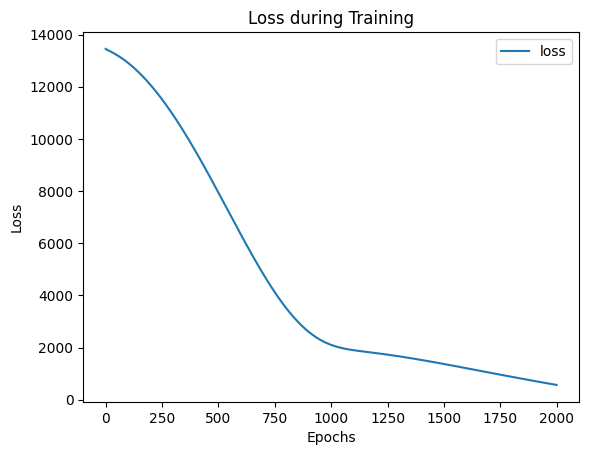

In [24]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [25]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 102.80030059814453
